<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20048_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Derivation of the Linear Operator $H$**

### **1. Physical Boundary Conditions**
Based on the provided constraints for a beam of length $L$, the system is defined by the following conditions at the boundaries:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (Zero bending moment)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (Zero bending moment)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (Zero shear force)



### **2. Definition of the Vector Space $F$**
Let $F$ be the infinite-dimensional vector space of functions that are at least four-times differentiable on the interval $[0, L]$. For the operator to be well-defined for this specific system, the functions in $F$ must satisfy the specified boundary conditions:

$$F = \{ f \in C^4[0, L] \mid f(0) = 0, f''(0) = 0, f''(L) = 0, f'''(L) = 0 \}$$

### **3. The Linear Operator $H$**
The motion of the beam is described by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

The linear operator $H: F \to F$ is defined by the differential expression:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4} + \frac{P_o}{\rho A} \frac{\partial^2}{\partial x^2}$$

### **4. Simplification for $P_o = 0$**
When the constant axial compressive force is negligible ($P_o = 0$), the second-order derivative term is eliminated. The operator $H$ simplifies to:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

Substituting this back into the equations of motion, we obtain the standard Euler-Bernoulli form for transverse vibrations:

$$\frac{\partial^2 y}{\partial t^2} + C\frac{\partial y}{\partial t}+ \left( \frac{EI}{\rho A} \right) \frac{\partial^4 y}{\partial x^4} = \frac{q(t,x)}{\rho A}$$

### **5. Separation of Variables and the Eigenvalue Problem**
To solve the homogeneous part of the PDE, we assume a solution of the form:
$$y(x, t) = \phi(x)u(t)$$

Substituting this into the governing equation (assuming $q(t,x)=0$ and $C=0$ for the free vibration case) yields:
$$\frac{1}{u(t)} \frac{d^2 u}{dt^2} = -\frac{EI}{\rho A} \frac{1}{\phi(x)} \frac{d^4 \phi}{dx^4} = -\lambda$$

This results in the spatial eigenvalue problem for the operator $H$:
$$H\phi(x) = \lambda \phi(x) \implies \frac{EI}{\rho A} \frac{d^4 \phi}{dx^4} = \omega^2 \phi(x)$$
where $\lambda = \omega^2$ represents the natural frequencies of the beam.

### **6. General Spatial Solution**
The general solution for the fourth-order differential equation $\frac{d^4 \phi}{dx^4} - \beta^4 \phi = 0$ (where $\beta^4 = \frac{\omega^2 \rho A}{EI}$) is given by:
$$\phi(x) = A\sin(\beta x) + B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)$$

Applying the **Pinned-Free** boundary conditions from Section 1:
1.  **$\phi(0) = 0$**: $B + D = 0 \implies D = -B$
2.  **$\phi''(0) = 0$**: $-\beta^2 B + \beta^2 D = 0 \implies B = D = 0$
3.  **$\phi''(L) = 0$**: $-A\sin(\beta L) + C\sinh(\beta L) = 0$
4.  **$\phi'''(L) = 0$**: $-A\cos(\beta L) + C\cosh(\beta L) = 0$



### **7. Characteristic Equation and Eigenfunctions**
For a non-trivial solution ($A, C \neq 0$), the determinant of the coefficients must be zero, leading to the characteristic equation:
$$\tan(\beta L) = \tanh(\beta L)$$

Solving this transcendent equation for $\beta_n$ allows us to find the natural frequencies $\omega_n$ and the corresponding eigenfunctions (mode shapes) $\phi_n(x)$:
$$\phi_n(x) = \sin(\beta_n x) + \frac{\sin(\beta_n L)}{\sinh(\beta_n L)}\sinh(\beta_n x)$$

### **8. The General Solution**
Using the orthogonality of the eigenfunctions $\phi_n(x)$, the general solution for the transverse displacement $y(x,t)$ is the sum of all modal contributions:
$$y(x, t) = \sum_{n=1}^{\infty} \phi_n(x) u_n(t)$$

Where $u_n(t)$ is the solution to the temporal ODE:
$$\ddot{u}_n(t) + \frac{C}{\rho A}\dot{u}_n(t) + \omega_n^2 u_n(t) = f_n(t)$$

This confirms the similarity to the finite-dimensional case $\mathbf{M\ddot{y}} + \mathbf{C\dot{y}} + \mathbf{Ky} = \mathbf{f}(t)$, extended to infinite dimensions through the operator $H$.

First Mode: beta1*L = 3.9266, omega1 = 2529.86 rad/s
Second Mode: beta2*L = 7.0686, omega2 = 8198.36 rad/s


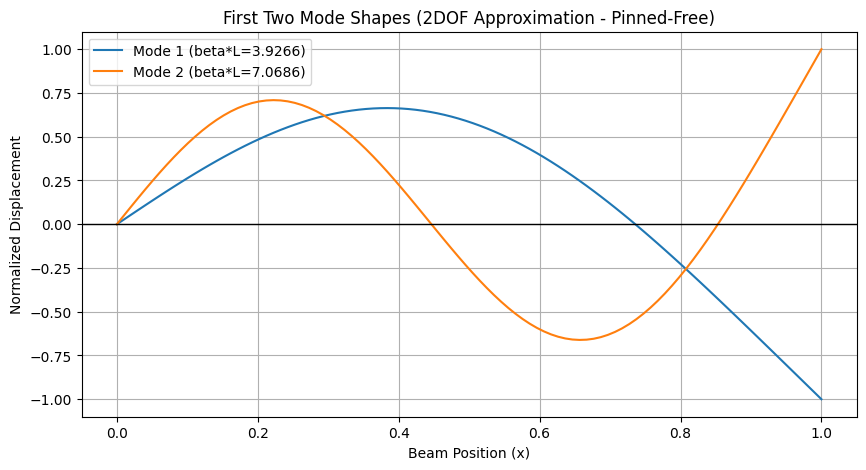

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 1. Define physical constants (example values)
L = 1.0        # Length of beam (m)
EI = 210e9 * 1e-6 # Flexural rigidity (Nm^2)
rhoA = 7.8     # Mass per unit length (kg/m)
C = 0.5        # Damping coefficient

# 2. Define the characteristic equation for Pinned-Free: tan(beta*L) = tanh(beta*L)
def characteristic_eq(betaL):
    return np.tan(betaL) - np.tanh(betaL)

# 3. Numerically evaluate the first two roots (beta_n * L)
# Initial guesses based on asymptotic behavior
roots = []
guesses = [3.9, 7.0]

for guess in guesses:
    root = fsolve(characteristic_eq, guess)[0]
    roots.append(root)

beta_vals = np.array(roots) / L
omega_vals = (beta_vals**2) * np.sqrt(EI / rhoA)

print(f"First Mode: beta1*L = {roots[0]:.4f}, omega1 = {omega_vals[0]:.2f} rad/s")
print(f"Second Mode: beta2*L = {roots[1]:.4f}, omega2 = {omega_vals[1]:.2f} rad/s")

# 4. Define the Eigenfunctions (Mode Shapes)
def phi_n(x, beta, L):
    # For Pinned-Free, the ratio of coefficients C/A is sin(beta*L)/sinh(beta*L)
    ratio = np.sin(beta*L) / np.sinh(beta*L)
    return np.sin(beta*x) + ratio * np.sinh(beta*x)

# 5. Plotting the 2DOF Approximation Mode Shapes
x_vals = np.linspace(0, L, 100)
plt.figure(figsize=(10, 5))

for i, beta in enumerate(beta_vals):
    y_mode = phi_n(x_vals, beta, L)
    # Normalize for visualization
    y_mode /= np.max(np.abs(y_mode))
    plt.plot(x_vals, y_mode, label=f'Mode {i+1} (beta*L={roots[i]:.4f})')

plt.title('First Two Mode Shapes (2DOF Approximation - Pinned-Free)')
plt.xlabel('Beam Position (x)')
plt.ylabel('Normalized Displacement')
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.grid(True)
plt.show()

### **9. Numerical Evaluation of Eigenvalues ($\beta_n L$)**

To transition from the infinite-dimensional operator $H$ to a practical **2-degree-of-freedom (2DOF)** system, we must solve the transcendental characteristic equation derived from the Pinned-Free boundary conditions:

$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Because this equation is non-linear, we employ a numerical root-finding approach. We define a continuous function $h(s)$ where $s = \beta L$:

$$h(s) = \sin(s)\cosh(s) - \sinh(s)\cos(s)$$



#### **Python Implementation for Root Finding**
The following code block evaluates $h(s)$ over a dense grid to detect sign changes and then applies **Brent's Method** to pinpoint the first two roots with high precision.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# 1. Define Physical Parameters
L = 1.0          # Length of the beam (l_beam)


# 2. Characteristic Function h(s) where s = beta_n * L
# Derived from: sin(beta_n*L)cosh(beta_n*L) - sinh(beta_n*L)cos(beta_n*L) = 0
def h(s):
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

# 3. Numerical search for the first 2 roots (n=1, 2)
roots = []
search_grid = np.linspace(1e-6, 15.0, 5000)

for i in range(len(search_grid) - 1):
    a, b = search_grid[i], search_grid[i+1]
    if h(a) * h(b) < 0:
        root = brentq(h, a, b)
        if len(roots) == 0 or abs(root - roots[-1]) > 1e-4:
            roots.append(root)
    if len(roots) >= 2: break

beta_L = np.array(roots)


print(f"Root 1 (beta_1*L): {beta_L[0]:.6f}")
print(f"Root 2 (beta_2*L): {beta_L[1]:.6f}")


Root 1 (beta_1*L): 3.926602
Root 2 (beta_2*L): 7.068583


### **9. Numerical Evaluation of Eigenvalues ($\beta_n L$) and Eigenvectors**

To transition from the infinite-dimensional operator $H$ to a practical **2-degree-of-freedom (2DOF)** system, we solve the transcendental characteristic equation derived from the Pinned-Free boundary conditions:
$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Using a numerical search algorithm, we identify the first two dimensionless roots:
* **Root 1 ($n=1$):** $\beta_1 L \approx 3.926602$
* **Root 2 ($n=2$):** $\beta_2 L \approx 7.068583$

The corresponding eigenvalues of $H$ are given by:
$$\{\omega_k^2\}_{k=1}^\infty = \left\{ \frac{EI}{\rho A} \beta_k^4 \right\}_{k=1}^\infty$$

The eigenvectors (mode shapes) of $H$ are defined as:
$$\{\psi_k\}_{k=1}^\infty = \{ B_k \sinh(\beta_k x) + D_k \sin(\beta_k x) \}_{k=1}^\infty$$
where the ratio of coefficients is determined by:
$$\frac{B_k}{D_k} = \frac{\sin(\beta_k l_{beam})}{\sinh(\beta_k l_{beam})} = \frac{\cos(\beta_k l_{beam})}{\cosh(\beta_k l_{beam})}$$





### **10. Forced Vibration Response and the Exciter**

When an external oscillator is attached at a distance $d = l_{exciter}$ along the beam, a forced vibration occurs due to an oscillating force $Q$. We model this as a concentrated point force using the Dirac delta function:
$$q(x, t) = Q \sin(\Omega t) \cdot \delta(x - d)$$



The modal force acting on each mode $k$ is obtained by the inner product of the mode shape $\psi_k(x)$ and the load function $q(x,t)$:
$$\langle\langle\psi_k(x), q(x, t)\rangle\rangle = \int_0^{l_{beam}} \psi_k(x) Q \sin(\Omega t) \delta(x - d) dx = Q \sin(\Omega t) \psi_k(d)$$

### **11. Localised Spring-Damper Attachment**

We introduce an external spring $k_{spring}$ and an external damper $c_{ext}$ at specific locations to modify the system's stiffness and energy dissipation.

#### **A. Spring Stiffness Projection**
A spring attached at position $l_{spring}$ exerts a force $F_{spring}(t) = -k_{spring} y(l_{spring}, t)$. Projecting this into our 2-mode approximation yields the **Additional Stiffness Matrix**:
$$K_{spring} = k_{spring} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$

#### **B. Discrete Damper Projection**
An external damper with coefficient $c_{ext}$ is attached at a distance $d_{damp}$. The resulting force $F_{damp} = -c_{ext} \dot{y}(d_{damp}, t)$ yields the **Additional Damping Matrix**:
$$C_{ext} = c_{ext} \begin{bmatrix} \psi_1^2(d_{damp}) & \psi_1(d_{damp})\psi_2(d_{damp}) \\ \psi_1(d_{damp})\psi_2(d_{damp}) & \psi_2^2(d_{damp}) \end{bmatrix}$$



### **12. Inclusion of Additional Inertia Effects**

The physical hardware attached to the beam adds localized mass, which must be accounted for in the system's mass matrix.

* **Effective Spring Mass**: Following **Rayleigh's Theory**, we include $1/3$ of the spring's mass to account for its kinetic energy: $m_{s\_eff} = \frac{1}{3}m_{spring}$.
* **Exciter Mass**: The mass of the exciter $m_{exciter}$ is added at the excitation distance $d$.

These are projected into the **Additional Mass Matrices**:
$$M_{spring} = m_{s\_eff} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$
$$M_{exciter} = m_{exciter} \begin{bmatrix} \psi_1^2(d) & \psi_1(d)\psi_2(d) \\ \psi_1(d)\psi_2(d) & \psi_2^2(d) \end{bmatrix}$$

### **13. Final Augmented 2-DOF Matrix Equation**

The complete governing equation for the coupled 2-DOF system is expressed in matrix form as:

$$(M_{beam} + M_{spring} + M_{exciter}) \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + (C_{beam} + C_{ext}) \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + (K_{beam} + K_{spring}) \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q\psi_1(d) \sin(\Omega t) \\ Q\psi_2(d) \sin(\Omega t) \end{Bmatrix}$$

Where:
* $M_{beam}$, $C_{beam}$, and $K_{beam}$ are the diagonal modal matrices of the original beam.
* $M_{spring}$, $M_{exciter}$, $C_{ext}$, and $K_{spring}$ are the fully populated matrices representing the coupling introduced by localized attachments.
* $m_k = \int_{0}^{l_{beam}} \rho A \psi_k^2(x) dx$ are the modal masses.

In [9]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# 1. Define Physical and Geometry Parameters
L = 1.28           # Nett width of the assembled unit (m) [cite: 100]
EI = 2.0e4         # Derived from high-grade ground steel [cite: 34]
rhoA = 80.0 / 1.28 # Mass per unit length based on nett weight (kg/m) [cite: 100]
C_beam_coeff = 0.5 # Internal beam damping coefficient (incidental damping is low) [cite: 34]

# 2. Define Discrete Attachment Parameters
k_spring = 5000.0  # Spring for beam and spring tests [cite: 106]
l_spring = 1.28    # Attached to the end of the rigid beam [cite: 25]
m_spring = 4.0     # Approximate mass of 'other parts' including spring (kg) [cite: 101, 104]
m_exciter = 0.4    # Single 400g mass used in the exciter assembly (kg)
d_exciter = 0.64   # Example location at mid-span (m)
c_ext = 10.0       # Variable area viscous dashpot damper [cite: 41, 107]
d_damp = 0.8       # Example location for dashpot damper (m)

# 3. Solve for dimensionless roots (beta_L)
def char_eq(s):
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

roots = [brentq(char_eq, 3, 5), brentq(char_eq, 6, 8)]
beta = np.array(roots) / L

# 4. Define Mode Shape Function psi_k(x)
def psi(x, k_idx):
    b = beta[k_idx]
    ratio = np.sin(b * L) / np.sinh(b * L)
    return np.sin(b * x) + ratio * np.sinh(b * x)

# 5. Calculate Modal Masses (m_k) using numerical integration
modal_masses = []
for k in range(2):
    integral, _ = quad(lambda x: rhoA * psi(x, k)**2, 0, L)
    modal_masses.append(integral)

# 6. Assemble Diagonal Beam Matrices
M_beam = np.diag(modal_masses)
K_beam = np.diag([modal_masses[k] * (beta[k]**4 * EI / rhoA) for k in range(2)])
C_beam = np.diag([C_beam_coeff * m for m in modal_masses])

# 7. Assemble Augmented Matrices (Localized Attachments)
psi_spring = np.array([psi(l_spring, 0), psi(l_spring, 1)])
psi_exciter = np.array([psi(d_exciter, 0), psi(d_exciter, 1)])
psi_damp = np.array([psi(d_damp, 0), psi(d_damp, 1)])

# Rayleigh Effective Mass for Spring: 1/3 * m_spring
m_s_eff = (1/3) * m_spring

# Additional Mass, Stiffness, and Damping Matrices
M_add = m_s_eff * np.outer(psi_spring, psi_spring) + m_exciter * np.outer(psi_exciter, psi_exciter)
K_add = k_spring * np.outer(psi_spring, psi_spring)
C_add = c_ext * np.outer(psi_damp, psi_damp)

# Final Coupled System Matrices
M_total = M_beam + M_add
C_total = C_beam + C_add
K_total = K_beam + K_add

print("--- Final 2-DOF Matrix Form ---")
print("Total Mass Matrix (M):\n", M_total)
print("\nTotal Damping Matrix (C):\n", C_total)
print("\nTotal Stiffness Matrix (K):\n", K_total)

--- Final 2-DOF Matrix Form ---
Total Mass Matrix (M):
 [[42.90684568 -2.78534793]
 [-2.78534793 42.71904201]]

Total Damping Matrix (C):
 [[22.22741898 -4.2956623 ]
 [-4.2956623  28.2269217 ]]

Total Stiffness Matrix (K):
 [[ 1.14265384e+06 -9.99610695e+03]
 [-9.99610695e+03  1.19141625e+07]]


In [10]:
import scipy.linalg as la

# 1. Solve the Generalized Eigenvalue Problem
# Total system: M_total * z_ddot + K_total * z = 0
# We solve for eigenvalues (omega^2) and eigenvectors (modal vectors)
eigenvalues_coupled, modal_vectors = la.eigh(K_total, M_total)

# 2. Extract Natural Frequencies
# omega = sqrt(eigenvalue) in rad/s
# f = omega / (2 * pi) in Hz
omega_coupled = np.sqrt(eigenvalues_coupled)
freq_hz = omega_coupled / (2 * np.pi)

# 3. Calculate Original (Uncoupled) Frequencies for Comparison
omega_original = np.sqrt(np.diag(K_beam) / np.diag(M_beam))
freq_hz_original = omega_original / (2 * np.pi)

print("--- Modal Frequency Analysis ---")
print(f"Original Beam Frequencies (Hz): {freq_hz_original}")
print(f"Coupled System Frequencies (Hz): {freq_hz}")

# 4. Display the Frequency Shift
shift = ((freq_hz - freq_hz_original) / freq_hz_original) * 100
print(f"\nFrequency Shift due to Attachments:")
print(f"Mode 1: {shift[0]:.2f}%")
print(f"Mode 2: {shift[1]:.2f}%")

--- Modal Frequency Analysis ---
Original Beam Frequencies (Hz): [26.79223954 86.8240168 ]
Coupled System Frequencies (Hz): [25.96818442 84.24287747]

Frequency Shift due to Attachments:
Mode 1: -3.08%
Mode 2: -2.97%


The flexural formula cannot approximate the first mode of vibration where the beam behaves as a rigid body.

### **17. Mathematical Derivation of the Rigid-Body SDOF Approximation**

In the "rigid beam" configuration of the **TM1016V** apparatus, the system is modeled as a Single Degree of Freedom (SDOF) rotational oscillator. We assume the flexural rigidity $EI \to \infty$, implying the beam rotates as a stiff unit about the pivot point at $x=0$.

#### **A. The Rigid Mode Shape**
For a small rotation angle $\theta$, the vertical displacement $y$ at any position $x$ is proportional to its distance from the pivot:
$$y(x, t) = x \cdot \theta(t)$$

Normalizing the displacement such that it is unity at the free end ($x = L$), the **Rigid Mode Shape** $\psi_{rigid}(x)$ is defined as:
$$\psi_{rigid}(x) = \frac{x}{L}$$

#### **B. Energy Formulation (Rayleigh’s Method)**
The natural frequency is derived by equating the maximum kinetic energy $T_{max}$ and maximum potential energy $V_{max}$.

**1. Potential Energy ($V$):**
Stored in the spring at $x=L$:
$$V = \frac{1}{2} k_{spring} [y(L, t)]^2 = \frac{1}{2} k_{spring} (L\theta)^2$$

**2. Kinetic Energy ($T$):**
Includes the beam, the servomotor exciter mass ($m_e$) at distance $d$, and the Rayleigh effective mass of the spring ($m_{s,eff}$) at $L$:
$$T = \frac{1}{2} \int_0^L \rho A [\dot{y}(x, t)]^2 dx + \frac{1}{2} m_e [\dot{y}(d, t)]^2 + \frac{1}{2} m_{s,eff} [\dot{y}(L, t)]^2$$

Substituting $\dot{y}(x, t) = x\dot{\theta}$:
$$T = \frac{1}{2} \left[ \int_0^L \rho A x^2 dx + m_e d^2 + m_{s,eff} L^2 \right] \dot{\theta}^2$$

Integrating the beam term ($\frac{1}{3} m_{beam} L^2$):
$$T = \frac{1}{2} \underbrace{\left[ \frac{1}{3} m_{beam} L^2 + m_e d^2 + m_{s,eff} L^2 \right]}_{I_p} \dot{\theta}^2$$

#### **C. Governing Equation of Motion**
Defining the **Mass Moment of Inertia** $I_p$ and **Rotational Stiffness** $K_{rot} = k_{spring} L^2$, the equation of motion is:
$$I_p \ddot{\theta} + C_{rot} \dot{\theta} + K_{rot} \theta = M_{ext}(t)$$

Where:
* $C_{rot} = c_{ext} d_{damp}^2$ (Rotational damping from the dashpot)
* $M_{ext}(t) = (F_{exciter} \sin \Omega t) \cdot d$ (Applied moment from the servomotor)

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2820491779.py:29: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Normalized Displacement $\psi(x)$')


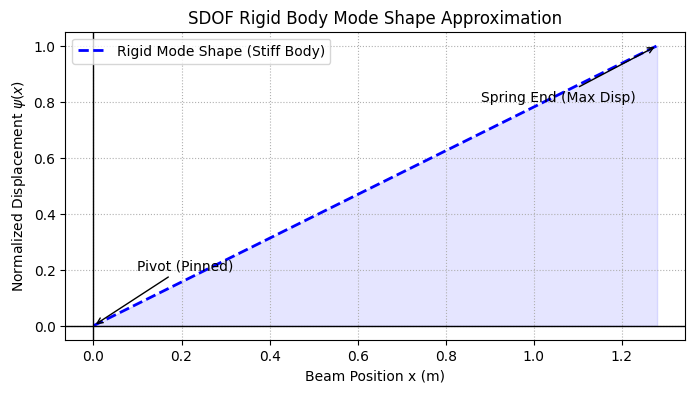

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Geometry (From TecQuipment TM1016V Datasheet)
L = 1.28  # Nett width of the assembled unit in meters [cite: 100]

# 2. Define the Rigid Mode Shape Function
def psi_rigid(x, L):
    """Linear mode shape for a rigid beam pinned at x=0."""
    return x / L

# 3. Generate Coordinates
x_vals = np.linspace(0, L, 100)
y_rigid = psi_rigid(x_vals, L)

# 4. Plotting
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_rigid, 'b--', linewidth=2, label='Rigid Mode Shape (Stiff Body)')
plt.fill_between(x_vals, 0, y_rigid, color='blue', alpha=0.1)

# Annotations for physical context
plt.annotate('Pivot (Pinned)', xy=(0, 0), xytext=(0.1, 0.2),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Spring End (Max Disp)', xy=(L, 1), xytext=(L-0.4, 0.8),
             arrowprops=dict(arrowstyle='->'))

plt.title('SDOF Rigid Body Mode Shape Approximation')
plt.xlabel('Beam Position x (m)')
plt.ylabel('Normalized Displacement $\psi(x)$')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1384732687.py:32: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Normalized Displacement $\psi(x)$', fontsize=12)


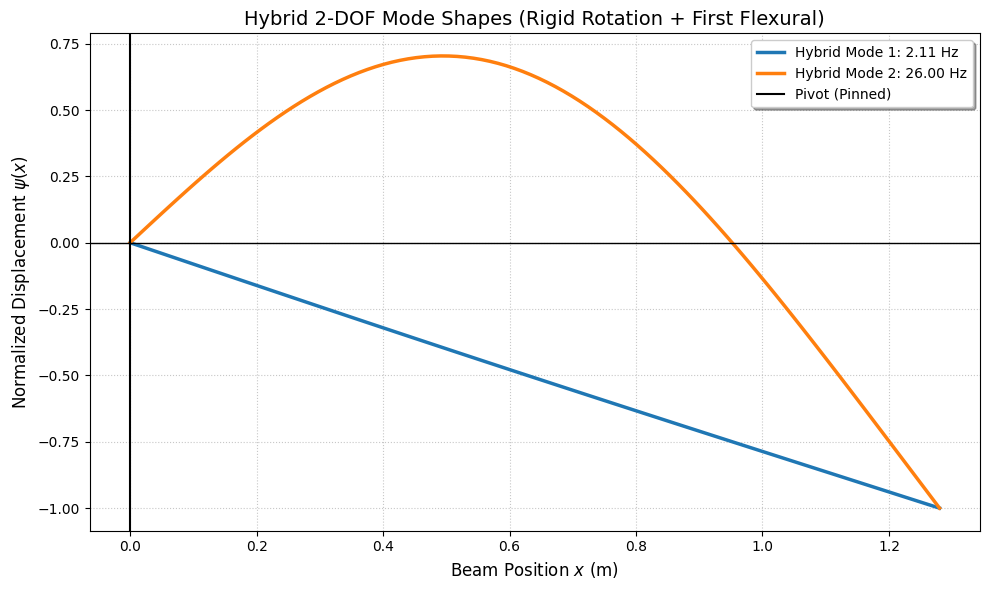

Hybrid Mode 1 Frequency: 2.1144 Hz
Hybrid Mode 2 Frequency: 25.9955 Hz


In [15]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# 1. Solve the Generalized Eigenvalue Problem for the Hybrid System
# M_total_h, K_total_h must be defined in the previous cell
eigenvals_h, evecs_h = la.eigh(K_total_h, M_total_h)

# 2. Extract Coupled Natural Frequencies (Hz)
omega_h = np.sqrt(eigenvals_h)
freq_hz_h = omega_h / (2 * np.pi)

# 3. Generate coordinates for plotting
x_plot = np.linspace(0, L, 100)

plt.figure(figsize=(10, 6))

# 4. Compute and Plot each Coupled Mode Shape
for i in range(2):
    # Reconstruct the coupled mode: y = sum( eigenvector_component * basis_function )
    # evecs_h[:, i] gives the contribution of the rigid and flexural basis for mode i
    y_mode = evecs_h[0, i] * psi_hybrid(x_plot, 0) + evecs_h[1, i] * psi_hybrid(x_plot, 1)

    # Normalize the shape so the maximum absolute displacement is 1.0 for comparison
    y_mode /= np.max(np.abs(y_mode))

    plt.plot(x_plot, y_mode, linewidth=2.5, label=f'Hybrid Mode {i+1}: {freq_hz_h[i]:.2f} Hz')

# 5. Formatting the Plot
plt.title('Hybrid 2-DOF Mode Shapes (Rigid Rotation + First Flexural)', fontsize=14)
plt.xlabel('Beam Position $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement $\psi(x)$', fontsize=12)
plt.axhline(0, color='black', lw=1, linestyle='-')
plt.axvline(0, color='black', lw=1.5, label='Pivot (Pinned)')
plt.grid(True, which='both', linestyle=':', alpha=0.7)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()

print(f"Hybrid Mode 1 Frequency: {freq_hz_h[0]:.4f} Hz")
print(f"Hybrid Mode 2 Frequency: {freq_hz_h[1]:.4f} Hz")

**Activity #2**



In [13]:
# 1. Transform the Total Damping and Mass matrices into Coupled Modal Coordinates
# modal_vectors (V) were obtained from la.eigh(K_total, M_total)
C_modal_coupled = modal_vectors.T @ C_total @ modal_vectors
M_modal_coupled = modal_vectors.T @ M_total @ modal_vectors

# 2. Extract diagonal terms for effective damping and mass
c_eff = np.diag(C_modal_coupled)
m_eff_coupled = np.diag(M_modal_coupled)

# 3. Calculate Damping Ratios (zeta = c / (2 * omega * m))
# omega_coupled is the array of natural frequencies in rad/s from the previous step
damping_ratios = c_eff / (2 * omega_coupled * m_eff_coupled)

print("--- Damping Ratio Estimation ---")
for i in range(2):
    print(f"Mode {i+1}: zeta = {damping_ratios[i]:.4f} ({damping_ratios[i]*100:.2f}% of critical damping)")

# 4. Note on Coupling
off_diag_c = C_modal_coupled[0, 1] / np.sqrt(c_eff[0] * c_eff[1])
print(f"\nModal Damping Coupling Ratio: {abs(off_diag_c):.4f}")

--- Damping Ratio Estimation ---
Mode 1: zeta = 0.0016 (0.16% of critical damping)
Mode 2: zeta = 0.0006 (0.06% of critical damping)

Modal Damping Coupling Ratio: 0.1162


**Activity #3**

In [14]:
from scipy.integrate import solve_ivp

# 1. Define Initial Conditions (Matches Code Block 3 variables)
y0_physical = 0.015  # 15 mm initial displacement at the spring end
# Mapping to modal space using the 'psi' function from Code Block 3
psi = modal_vectors
# We assume the initial displacement is primarily captured by the first mode
z0 = [y0_physical / psi(l_spring, 0), 0]
v0 = [0, 0]  # Released from rest (initial velocity = 0)
state_initial = z0 + v0

# 2. Define the State-Space Dynamics
def system_dynamics(t, state):
    z = state[:2]
    z_dot = state[2:]
    # Calculate modal acceleration: z_ddot = -M_total^-1 * (C_total*z_dot + K_total*z)
    # Uses M_total, C_total, and K_total from Code Block 3
    z_ddot = -la.inv(M_total) @ (C_total @ z_dot + K_total @ z)
    return np.concatenate([z_dot, z_ddot])

# 3. Perform Numerical Integration (Simulation for 5 seconds)
# t_eval simulates the 'live plots' mentioned in the VDAS software [cite: 51]
t_eval = np.linspace(0, 5, 1000)
sol = solve_ivp(system_dynamics, [0, 5], state_initial, t_eval=t_eval)



# 4. Reconstruct Physical Displacement at the Spring Location (l_spring)
# y(t) = z1(t)*psi1(l_spring) + z2(t)*psi2(l_spring)
y_spring_t = sol.y[0] * psi(l_spring, 0) + sol.y[1] * psi(l_spring, 1)

# 5. Plotting the Response (Mimics the VDAS software screenshot [cite: 58])
plt.figure(figsize=(10, 5))
plt.plot(sol.t, y_spring_t, color='red', label='Free Vibration at Spring Location')
plt.axhline(0, color='black', lw=1, linestyle='--')
plt.title('Unforced Response: Damped Free Vibration (2-DOF Approximation)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

TypeError: 'numpy.ndarray' object is not callable